# Practicant amb training i test sets



In [1]:
# Data 
#---------------------------------------------
import numpy as np
import pandas as pd

# Data visualization
#----------------------------------------------
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

# Prepocesing
#----------------------------------------------
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# 1. Ingesta de datos

In [2]:
df=pd.read_csv('vuelos_final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936756 entries, 0 to 1936755
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   DayOfYear          int64  
 2   Year               int64  
 3   Month              int64  
 4   Day                int64  
 5   DayOfWeek          int64  
 6   Hour               int64  
 7   Status             object 
 8   ArrDelay           float64
 9   DepDelay           float64
 10  TaxiIn             float64
 11  TaxiOut            float64
 12  CancellationCode   object 
 13  UniqueCarrier      object 
 14  CarrierName        object 
 15  TailNum            object 
 16  YearOfManufact     float64
 17  Origin             object 
 18  Dest               object 
 19  FlightNum          int64  
 20  Distance           int64  
 21  Skyway             object 
 22  city_or            object 
 23  state_or           object 
 24  country            object 
 25  city_dest         

In [4]:
# New features
delayed={'On time':0,
         'Delayed':1,
         'Highly Delayed':1,
         'Diverted':2,
         'Cancelled':2}

df['Is_Delayed']=df['Status'].map(delayed)

In [6]:
# New feature - Number of flights por hour on origin
df=df.join(df.groupby(['Origin','Date','Hour'])[['FlightNum']].count(),
           how='left',
           on=['Origin','Date','Hour'],
           rsuffix='h_')

In [7]:
# New feature - Number of flights por day on origin
df=df.join(df.groupby(['Origin','Date'])[['FlightNum']].count(),
           how='left',
           on=['Origin','Date'],
           rsuffix='d_')

In [8]:
df.rename(columns={'FlightNumh_':'flights_hour',
                   'FlightNumd_':'flights_day'}, inplace=True)

In [9]:
# Drop features
df.drop(axis=1,columns=['Date','Year','Status','CancellationCode','CarrierName','TailNum','FlightNum',
                        'city_or','state_or','city_dest','state_dest','country'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936756 entries, 0 to 1936755
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DayOfYear          int64  
 1   Month              int64  
 2   Day                int64  
 3   DayOfWeek          int64  
 4   Hour               int64  
 5   ArrDelay           float64
 6   DepDelay           float64
 7   TaxiIn             float64
 8   TaxiOut            float64
 9   UniqueCarrier      object 
 10  YearOfManufact     float64
 11  Origin             object 
 12  Dest               object 
 13  Distance           int64  
 14  Skyway             object 
 15  CarrierDelay       float64
 16  WeatherDelay       float64
 17  NASDelay           float64
 18  SecurityDelay      float64
 19  LateAircraftDelay  float64
 20  Is_Delayed         int64  
 21  flights_hour       int64  
 22  flights_day        int64  
dtypes: float64(10), int64(9), object(4)
memory usage: 339.9+ MB


In [11]:
# Descriptive analysis
df.describe()

,DayOfYear,Month,Day,DayOfWeek,Hour,ArrDelay,DepDelay,TaxiIn,TaxiOut,YearOfManufact,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Is_Delayed,flights_hour,flights_day
count,1.936756e+06,1.936756e+06,1.936756e+06,1.936756e+06,1.936756e+06,1.928369e+06,1.936756e+06,1.929646e+06,1.936301e+06,1.738371e+06,1.936756e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.936756e+06,1.936756e+06,1.936756e+06
mean,1.712009e+02,6.111111e+00,1.575346e+01,3.984827e+00,1.439864e+01,4.219988e+01,4.318517e+01,6.812973e+00,1.823221e+01,1.997542e+03,7.656863e+02,1.917939e+01,3.703577e+00,1.502162e+01,9.013728e-02,2.529651e+01,6.527720e-01,1.170402e+01,1.501076e+02
std,1.070209e+02,3.482546e+00,8.776268e+00,1.995967e+00,4.244424e+00,5.678474e+01,5.340253e+01,5.273597e+00,1.433854e+01,7.221218e+00,5.744799e+02,4.354623e+01,2.149292e+01,3.383307e+01,2.022716e+00,4.205488e+01,4.850997e-01,1.247477e+01,1.573309e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,0.000000e+00,0.000000e+00,1.956000e+03,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,7.800000e+01,3.000000e+00,8.000000e+00,2.000000e+00,1.100000e+01,9.000000e+00,1.200000e+01,4.000000e+00,1.000000e+01,1.993000e+03,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,3.900000e+01
50%,1.660000e+02,6.000000e+00,1.600000e+01,4.000000e+00,1.500000e+01,2.400000e+01,2.400000e+01,6.000000e+00,1.400000e+01,1.999000e+03,6.060000e+02,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,8.000000e+00,9.800000e+01
75%,2.530000e+02,9.000000e+00,2.300000e+01,6.000000e+00,1.800000e+01,5.600000e+01,5.300000e+01,8.000000e+00,2.100000e+01,2.003000e+03,9.980000e+02,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01,1.000000e+00,1.600000e+01,2.030000e+02
max,3.660000e+02,1.200000e+01,3.100000e+01,7.000000e+00,2.300000e+01,2.461000e+03,2.467000e+03,2.400000e+02,4.220000e+02,2.008000e+03,4.962000e+03,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03,2.000000e+00,9.400000e+01,1.001000e+03


In [12]:
df.isna().sum()

DayOfYear                 0
Month                     0
Day                       0
DayOfWeek                 0
Hour                      0
ArrDelay               8387
DepDelay                  0
TaxiIn                 7110
TaxiOut                 455
UniqueCarrier             0
YearOfManufact       198385
Origin                    0
Dest                      0
Distance                  0
Skyway                    0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
Is_Delayed                0
flights_hour              0
flights_day               0
dtype: int64

In [34]:
df.drop(df[df.Is_Delayed==2].index).isna().sum()

DayOfYear                 0
Month                     0
Day                       0
DayOfWeek                 0
Hour                      0
ArrDelay                  0
DepDelay                  0
TaxiIn                    0
TaxiOut                   0
UniqueCarrier             0
YearOfManufact       197254
Origin                    0
Dest                      0
Distance                  0
Skyway                    0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
Is_Delayed                0
flights_hour              0
flights_day               0
dtype: int64

## Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.



Voy a dividir el dataset con dos métodos diferentes, división aleatoria y división de manera aleatoria estratificada.

In [14]:
# Split 1

df_train, df_test = train_test_split(df,
                                     test_size=0.2,
                                     random_state=1984,)

In [15]:
# Distribución de las etiquetas en los dataset de test y train
lista=[df,df_train,df_test]
for i in lista:
    print(i.Is_Delayed.value_counts(normalize=True)*100)

1    64.411108
0    35.155848
2     0.433044
Name: Is_Delayed, dtype: float64
1    64.398762
0    35.166683
2     0.434554
Name: Is_Delayed, dtype: float64
1    64.460491
0    35.112507
2     0.427002
Name: Is_Delayed, dtype: float64


La variable categórica, Is_Delayed queda distribuida de manera similar en los dos datasets.

In [16]:
diferencias={}
for var in df_train.describe().columns:
    dif_media=((df_train[var].mean()-df_test[var].mean())/df_train[var].mean()*100)
    dif_std=((df_train[var].std()-df_test[var].std())/df_train[var].std()*100)
    diferencias[var]=(dif_media,dif_std)
diferencias=pd.DataFrame.from_dict(diferencias,
                                   orient='index',
                                   columns=['dif_medias(%)','dif_std(%)'])
diferencias

,dif_medias(%),dif_std(%)
DayOfYear,0.107059,0.054686
Month,0.106323,0.067974
Day,-0.095468,-0.032567
DayOfWeek,0.051321,-0.044104
Hour,0.016977,-0.103107
ArrDelay,0.018587,-0.091009
DepDelay,0.038252,-0.172241
TaxiIn,0.110533,0.413653
TaxiOut,-0.073187,-0.341950
YearOfManufact,-0.000189,-0.168730


No se aprecian grandes diferencias en la media y la desviación estándar de los dos conjuntos.

In [17]:
# Split 2 - Divión aleatoria estratificada.

X=df.drop(columns='Is_Delayed')
y=df.Is_Delayed

X_train_st, X_test_st , y_train_st , y_test_st = train_test_split(X,y,
                                                                 test_size=0.2,
                                                                 random_state=1984,
                                                                 stratify=y)

In [18]:
lista=[y,y_train_st,y_test_st]
for i in lista:
    print(i.value_counts(normalize=True)*100)

1    64.411108
0    35.155848
2     0.433044
Name: Is_Delayed, dtype: float64
1    64.411090
0    35.155841
2     0.433070
Name: Is_Delayed, dtype: float64
1    64.411182
0    35.155879
2     0.432940
Name: Is_Delayed, dtype: float64


In [19]:
diferencias_st={}
for var in X_train_st.describe().columns:
    dif_media=((X_train_st[var].mean()-X_test_st[var].mean())/X_train_st[var].mean()*100)
    dif_std=((X_train_st[var].std()-X_test_st[var].std())/X_train_st[var].std()*100)
    diferencias_st[var]=(dif_media,dif_std)
diferencias_st=pd.DataFrame.from_dict(diferencias_st,
                                   orient='index',
                                   columns=['dif_medias(%)','dif_std(%)'])
diferencias_st

,dif_medias(%),dif_std(%)
DayOfYear,0.013986,0.039354
Month,0.029722,0.051105
Day,-0.201580,-0.101283
DayOfWeek,-0.180351,0.122614
Hour,-0.019622,-0.034784
ArrDelay,-0.089317,-1.349101
DepDelay,-0.177721,-1.656681
TaxiIn,0.221168,0.807635
TaxiOut,0.040077,-0.263602
YearOfManufact,0.000402,-0.106253


## Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).


## Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [20]:
# Estandarizar ArrDelay
estandarizador=StandardScaler()

In [21]:
DepDelay_stdscaler=estandarizador.fit_transform(df_train.DepDelay.values.reshape(-1,1))

In [22]:
DepDelay_stdscaler.mean(),DepDelay_stdscaler.std()

(6.9306858414864e-17, 1.0)

In [23]:
DepDelay_stdscaler.min(),DepDelay_stdscaler.max()

(-0.6966205539706949, 35.75616493968142)

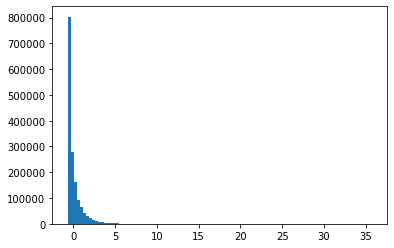

In [24]:
plt.hist(DepDelay_stdscaler,bins=100);

In [25]:
# Normalizar

In [26]:
maxmin=MinMaxScaler()
DepDelay_Maxmin=maxmin.fit_transform(df_train[['DepDelay']])

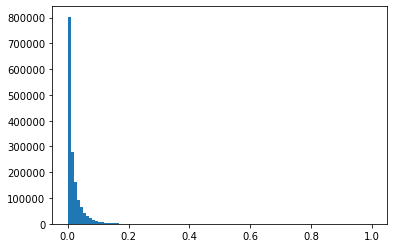

In [27]:
plt.hist(DepDelay_Maxmin,bins=100);

In [28]:
DepDelay_Maxmin.mean(),DepDelay_Maxmin.std()

(0.0191102146115008, 0.027432745850770168)

In [29]:
# Transformación polinómica

In [30]:
poli=PolynomialFeatures(degree=3)

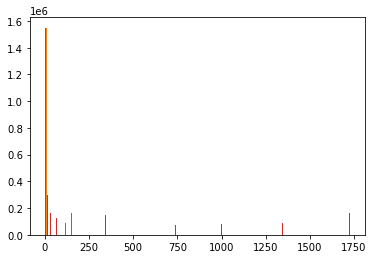

In [31]:
mes_al_cubo=poli.fit_transform(df_train.Month.values.reshape(-1,1))
plt.hist(mes_al_cubo,bins=100);